# PROJECT BOOLENA

## Abstract

Percolation theory describes how the size of clusters of connected set of edges of large random networks
varies as the connectivity - i.e. (for example) the probability that two vertices are connected by an edge - changes. As the
connectivity increases the system undergoes a transition from a situation where the clusters are small in size to
a picture with significantly larger clusters. This transition is not smooth, but rather it happens sharply as the
connectivity crosses a critical value, called percolation threshold∗. The scope of the present project is to study
numerically this phenomenon in Boolean networks

check:
-   perculation thery: wiki -> In statistical physics and mathematics, percolation theory describes the behavior of a network when nodes or links are added. This is a geometric type of phase transition, since at a critical fraction of addition the network of small, disconnected clusters merge into significantly larger connected, so-called spanning clusters.

-   perculation threshold
-   Boolean model network on R^2

## Boolean model network on R^2

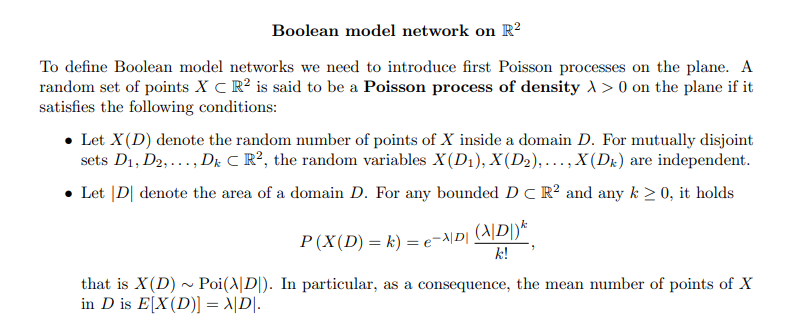

POISSON PROCESSES OF DENSITY

input: 

-   random set of X (sotto insieme di un dominio x,y)

-   Dk -> k number of domain, each D is a C of R^2

we want:

X -> Ppd if λ > 0

condition:

-   X(D): denote the number of X inside a domain D, the random variables X(D1), X(D2), ... , X(Dk) are independent; 

-   |D| denote the area of a domain D; k>=0 (how calculate the area of D?? is T*T??)

    P(X(D) = k) = e^(-λ|D|)((λ|D|)^k/k!);

    X(D) -> Poi(λ|D|);

    E[X(D)] = λ|D|



quindi come si legge?? 

-   X(D) è il numero di X dentro un dominio D
    quindi mi sembra di capire che dato un dominio D noi prendiamo X valori dal dominio e X è una poisson
-   so che X(D) è una poasson con valori densità (λ) * area di D
-   so che la densità (λ) * area di D è uguale alla media dei punti di X dentro D


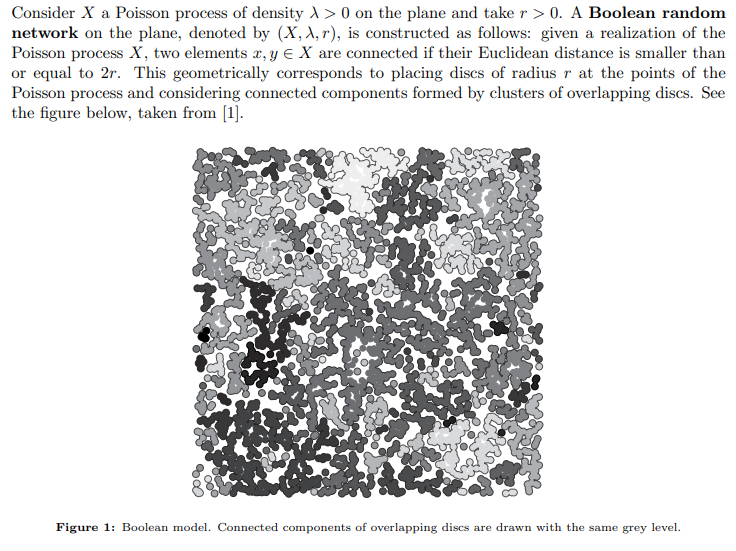

Boolean random network:

-   denote by : X, density > 0, r = raggio > 0

-   due elementi x,y che appartengono a X sono connessi se la loro distanza (Euclidian distance) è più piccola o uguale a 2 volte r 

-   geometricamente corrisponde a mettere dei dischi di raggio r sui punti della poisson process e consideriamo connessi tra loro i punti che, con i loro dischi, si sovrappongono o si toccano

praticamente per ogni punto della poisson gli applichiamo un cerchio attorno di raggio r, se due punti con i raggio si sovrappongono allora li raggruppiamo in un unico cluster

## Algorithm to simulate a Poisson process on a square

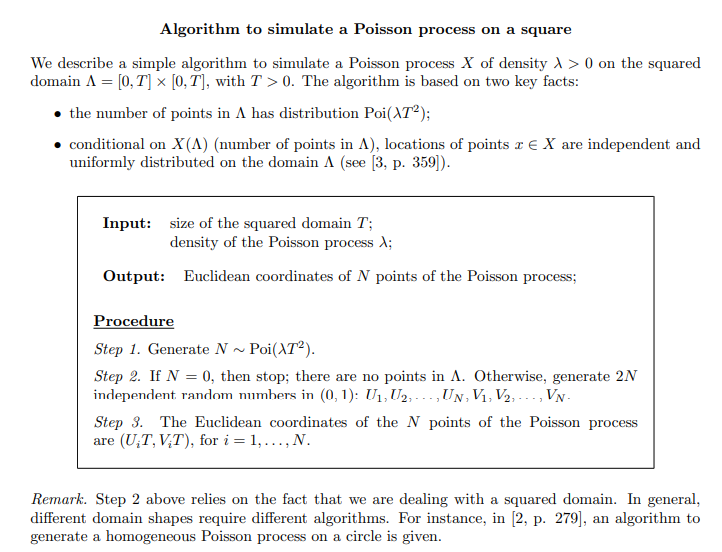

-   Λ = a D; si perchè Λ è un dominio come D

due punti chaive:

-   adesso sappiamo che X o N è una distribuzione di poison(λ*T^2)
-   conditional on X(Λ) (number of points in Λ), locations of points x ∈ X are independent and
uniformly distributed on the domain Λ

input:

-   T -> grandezza del dominio
-   densiti (λ)

output:

-   coordinate euclidee di N points della poisson, so coordinate (X,Y)

Passaggi:

-   tenere presente la grandezza del dominio D -> T
-   step1: generare gli N points come poisson (λT^2) 
-   step2: generare 2N independent random numbers in (0,1); 2N = a (U1,U2,...,UN V1,V2,...,VN) indicate the total number of points (U and V)
-   step3: creare le coordinate euclidee di N point -> (UiT, ViT) for i = 1,...,N (creare le coordinate)   

## Project

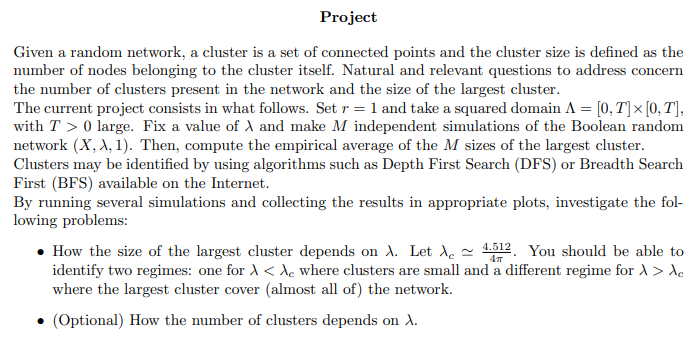

-   random network
-   we have to cluster points
-   number of clusters and size of clusters (question) (will return)

current project:
-   set r = 1
-   set T > 0
-   square domain D o Λ = [0,T] * [0,T]
-   set λ
-   we have to make M independent simulation of the Boolean random network:
    -   so first set M
    -   loop of M
        -   create X -> vedere poisson process on square
        -   create M Boolean network of (X, λ, r)
        -   cluster algorithm Depth First Search(DFS) or Breadth Search
First(BFS)
-   compute the empirical average of the M sizes of the largest cluster
-   collect the results in plots

question:

-   How the size of the largest cluster depends on λ. Let λc '
4.512
4π
. You should be able to
identify two regimes: one for λ < λc where clusters are small and a different regime for λ > λc
where the largest cluster cover (almost all of) the network.

-   How the number of clusters depends on λ

current project with question:

-   set r = 1
-   set T > 0
-   square domain D o Λ = [0,T] * [0,T]
-   set λ critique
-   set a list of λ
-   so first set M
-   set a list for the largest cluster on desity (mean on the M simulation)
-   set a list for the number of clusters on density (mean on the M simulation)
-   we have to simulate for every λ:
-   loop λ:
    -   we have to make M independent simulation of the Boolean random network:
    -   set a list for the largest cluster for the simualtion M
    -   set a list for the number of clusters for the simualtion M
    -   loop of M: 
        -   create X -> vedere poisson process on square
        -   create M Boolean network of (X, λ, r)
        -   cluster algorithm Depth First Search(DFS) or Breadth Search First(BFS)
        -   find and add the largest cluster
        -   find and add the number of cluster
-   compute the empirical average of the M sizes of the largest cluster and add
-   compute the empirical average of the M sizes of the number of clusters and add
-   collect the results in plots

# TEST 1

In [1]:
# try something for the project
import numpy as np
import matplotlib.pyplot as plt
import math
#ok per la parte dei boolean network mi consigliano networkx
#oppure provare usare pyboolnet
import networkx as nx

my_generator = np.random.default_rng()

In [ ]:
#euclidian distance 
def euclidean_distance(point1, point2):
    distance = 0.0
    for i in range(len(point1)):
        distance += (point2[i] - point1[i]) ** 2
    return math.sqrt(distance)

# OR use numpy
#dist = np.linalg.norm(point1 - point2)

In [ ]:
#function for the creation of the boolean network
def creation_boolena_network(N, points,r):
    #empty graph
    #nx.Graph? A Graph stores nodes and edges with optional data, or attributes
    #Edges are represented as links between nodes with optional key/value attributes
    graph = nx.Graph()
    #add the points in the graph
    #graph.add_nodes_from? nodes_for_adding : iterable container, attr: attributes
    graph.add_nodes_from(range(N))

    #two elements x, y ∈ X are connected if their Euclidean distance is smaller than or equal to 2r
    #check if two points have distance(euclidea) < 2*r
    for i in range(N):
        for j in range(i+1,N):
            #if euclidean_distance(points[i] - points[j]) <= 2*r: #TEST
            #    graph.add_edge(i,j)
            if np.linalg.norm(points[i] - points[j]) <= 2*r:
                graph.add_edge(i,j) #add edge; add an edge between the nodes
    
    return graph

In [ ]:
#Algorithm to simulate a Poisson process on a square
#function to create X

def generate_points(density, T):
    #Step 1. Generate N ∼ Poi(λT2).
    # define X -> random number of points inside a domain D (square domain)
    # X(D) -> poi(density|D|)
    # N -> poi(density*T^2)
    #np.random.poisson?
    #N = np.random.poisson(density*T*T)
    N = my_generator.poisson(lam=density*T*T)
    print(N)

    #Step 2. If N = 0, then stop; there are no points in Λ. Otherwise, generate 2N
    #independent random numbers in (0, 1): U1, U2, . . . , UN , V1, V2, . . . , VN .
    #controll that number_of_points is more than 0
    if N == 0: # how it can be 0????
        #stop
        return 0
    else:
        # generate 2N independent random numbers in (0, 1): U1, U2, . . . , UN , V1, V2, . . . , VN
        #points = np.random.uniform(0, T, (N, 2)) #
        #np.random.uniform? Samples are uniformly distributed over the half-open interval
        #parameters 
            # low = lower boundary -> 0
            # high = upper boudary -> 1
            # size = output shape (N,2) -> N*2
            # output format Ui,Vi
        #points = np.random.uniform(low = 0, high = 1, size = (N, 2)) #
        #points = my_generator.uniform(low = 0, high = 1, size = (N, 2)) #
        points = my_generator.uniform(low = 0, high = T, size = (N, 2)) 
        return N, points
        #return points #for TEST2

In [ ]:
#FIRST TEST
#input
r = 1 #radius of discs
#T = np.random.randint(100,200) #set size of the squared domain as a rnadom value between 10 e 20  
#T = 200 #set size of the domain #200 -> too much time , test with 10
T = 10
#density lambda
density = 0.1 #i dont know the best number (PER OGNI LOOP DEVO AUMENTARE LA DENSITA DI UN TOT)
#i have to also set the number of simulation 
M = 10

# now i try to generate the points
#for the pois i can use the formulation or i can search a library (numpy)
#pois is lambda * T^2
N, points = generate_points(density, T)
if (len(points) == 0): #we dont have points
    print("error N = 0")
else: 
    #print(points)
    #print("size points: ",points.shape)

    #now i create the boolean network model
    #ATTENZIONE dall esempio/projetto mi sembra che al creation_bool devo passare il numero di
    #punti nel dominio e non i punti; forse i punti li devo creare nel creation_bool
    #pero guardando l'esempio del algorithmo di poisson mi verebbe da fare tutto 
    #in un colpo; in caso creare due versioni!!!
    #OPPURE nel loop per creare i graph metto anche quello er la creazione
    #dei punti pero dovrei tenere fuori N (X) perchè è sempre lo stesso nella 
    #creazione del boolean network (quindi creazione N; loop -> creazione loop, creazione bool)
    graph_bool = creation_boolena_network(N, points,r)
    print(graph_bool)



# TEST 2

In [2]:
# try something for the project
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx

my_generator = np.random.default_rng()

In [3]:
def number_points(density, T):
    N = my_generator.poisson(lam=density*T*T)
    return N

In [24]:
#Test DFS algorithm for cluster
def dfs_creation_clusters(graph):
    
    visited = set() #set for node visited
    clusters = [] #list with all the clusters

    def dfs(node):
        
        cluster = [] #create a cluster
        stack = [node] #start with one point, in the while we can add more neighbor points
        
        while stack: #unitle its empty
            current = stack.pop() #take out a point
            if current not in visited: #check
                visited.add(current) #add to visit
                cluster.append(current) #add to the cluster
                stack.extend(graph.neighbors(current)) #check for neighbors and add to the stack

        return cluster

    for node in graph.nodes(): #loop node (points)
        if node not in visited: #check visited
            cluster = dfs(node) #create a cluster and call def dfs
            clusters.append(cluster) #add the cluster
    
    return clusters #list complited of cluster

In [25]:
# A Boolean random network on the plane, denoted by (X, λ, r)

def creation_boolean_network_test2(N_points, T, r):

    #given a realization of the Poisson process X
    #creation points
    points = my_generator.uniform(low = 0, high = T, size = (N_points, 2))

    if (len(points) == 0): #we dont have points
        print("error no points in the domain = 0") #impossible
        return
    else: 
        #creation graph
        #empty graph
        #nx.Graph? A Graph stores nodes and edges with optional data, or attributes
        #Edges are represented as links between nodes with optional key/value attributes
        graph = nx.Graph()
        #add the points in the graph (nodes)
        #graph.add_nodes_from? nodes_for_adding : iterable container, attr: attributes
        graph.add_nodes_from(range(N_points))

        #two elements x, y ∈ X are connected if their Euclidean distance is smaller than or equal to 2r
        #check if two points have distance(euclidea) < 2*r
        for i in range(N_points):
            for j in range(i+1, N_points):
                #if euclidean_distance(points[i] - points[j]) <= 2*r: 
                #    graph.add_edge(i,j)
                if np.linalg.norm(points[i] - points[j]) <= 2*r:
                    graph.add_edge(i, j) #add edge between nodei and node
        
        plot_boolean_network(graph, points, T)
        plot_boolean_network_radius(graph, points, T, r)

        return graph

In [26]:
# Function to plot the Boolean network
def plot_boolean_network(graph, points, T):

    #clusters = list(nx.connected_components(graph))
    clusters = dfs_creation_clusters(graph) #DFS
    largest_cluster = max(clusters, key=len)

    pos = {}
    for i in range(len(points)):
        pos[i] = points[i]
    
    plt.figure(figsize=(15, 15))
    #nx.draw(graph, pos, node_size=30, node_color='blue', with_labels=True, font_size = 8)
    nx.draw_networkx(graph, pos, node_size=30, node_color='yellow', with_labels=True, font_size = 8, font_color = 'black')
    #try to change the color for the largest cluster
    nx.draw_networkx(graph, pos, nodelist = largest_cluster, node_color = 'red', with_labels=False)
    
    plt.xlim(0, T)
    plt.ylim(0, T)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Boolean Network')
    plt.show()

#----------------------------------------------------------------

# Function to plot the Boolean network
def plot_boolean_network_radius(graph, points, T, r):

    clusters = list(nx.connected_components(graph))
    largest_cluster = max(clusters, key=len)

    pos = {}
    for i in range(len(points)):
        pos[i] = points[i]
    
    #work well only with T = 50!!!! i have to manually change every time, i dont know how to auto
    node_size = (2 * r) ** 2 * 300
    
    plt.figure(figsize=(15, 15))

    #color for the clusters
    colors = list(mcolors.TABLEAU_COLORS.keys())
    
    for i, cluster in enumerate(clusters): 
        nx.draw_networkx_nodes(graph, pos, nodelist=cluster, node_size=node_size, node_color=colors[i % len(colors)])
    #try to change the color for the largest cluster
    nx.draw_networkx(graph, pos, nodelist = largest_cluster, node_color = 'red', node_size = node_size)
    
    plt.xlim(0, T)
    plt.ylim(0, T)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Boolean Network')
    plt.show()

In [33]:
def find_largest_cluster(graph):
    
    #find alle the connected components
    #connected_components -> implements DFS or BFS maybe
    clusters = list(nx.connected_components(graph)) #it is a list of set
    clusters_DFS = dfs_creation_clusters(graph) #DFS , it is a list of list
    
    print("clusters: ", clusters)
    print("clusters_DFS:", clusters_DFS)
    
    #sort
    clusters_set_order = [] #i have to do this becouse .sort() doesnt work with the type set
    for i in range(len(clusters)):    
        clusters_set_order.append(sorted(clusters[i]))
        clusters_DFS[i].sort()
    print("clusters_order: ", clusters_set_order)
    print("number of cluster:", len(clusters_set_order))
    print("clusters_DFS_order:", clusters_DFS)
    print("number of cluster:", len(clusters_DFS))

    #perfect, DFS cluster and the library return the same result but the node are visited in a different order so connected_components work in a different on the visiting part!!! 
    #

    #print("test dfs:")
    #for i in nx.edge_dfs(graph):
    #    print(i)
    #ok parto da un nodo, lo salvo nei visitati, guardo quali sono gli altri nodi collegati
    #con edge e li inserisco in visitari, alla fine li salvo in un claster, passo al nodo succesivo 
    # cioè a quello che non ha visitato??
    #The depth-first search (DFS) algorithm starts from a given vertex and explores as far as possible along each branch before backtracking. It uses a stack data structure to keep track of vertices to visit. The algorithm begins by pushing the starting vertex onto the stack and continues until all vertices have been visited.
    
    #find the largest cluster
    largest_cluster = max(clusters, key=len)
    print("largest_cluster: ", largest_cluster)

    #return the size of the largest cluster
    return len(largest_cluster)

In [34]:
#find the empirical average and plot
def empirical_average(largest_cluster):

    #mean size of the largest clusters 
    mean = np.mean(largest_cluster)
    print("Empirical average of the M sizes of the largest cluster: ",mean)

    #plot
    plt.hist(largest_cluster, bins=30, edgecolor = 'black')
    plt.title('Distribution of Largest Cluster Sizes')
    plt.xlabel('Size of Largest Cluster')
    plt.ylabel('Frequency')
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label=f'Average = {mean:.2f}')
    plt.legend()
    plt.show()

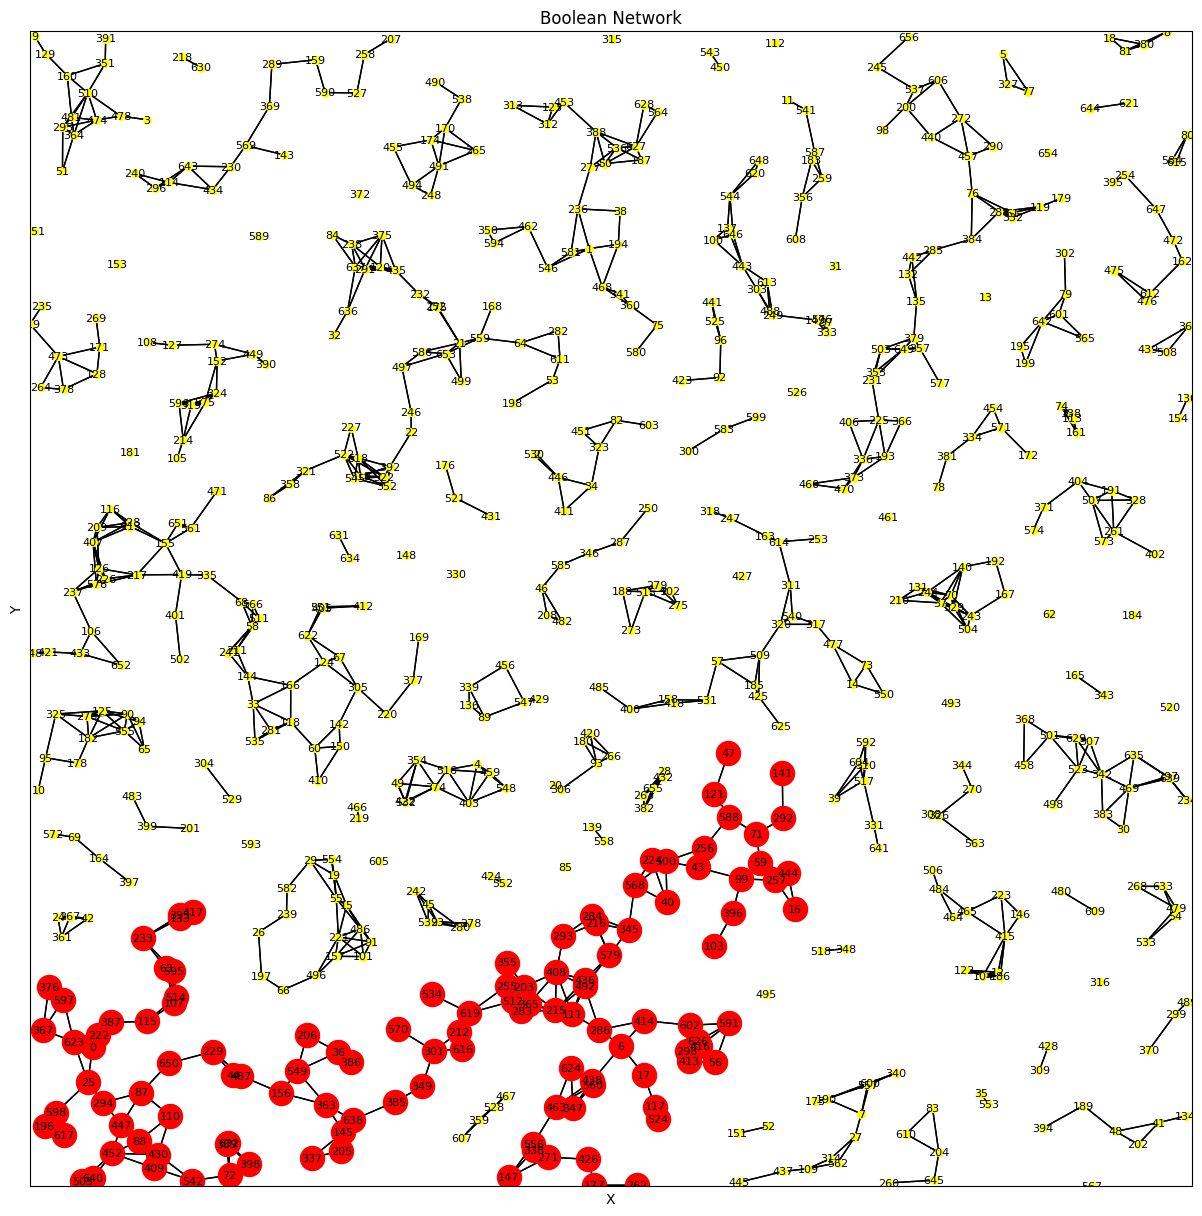

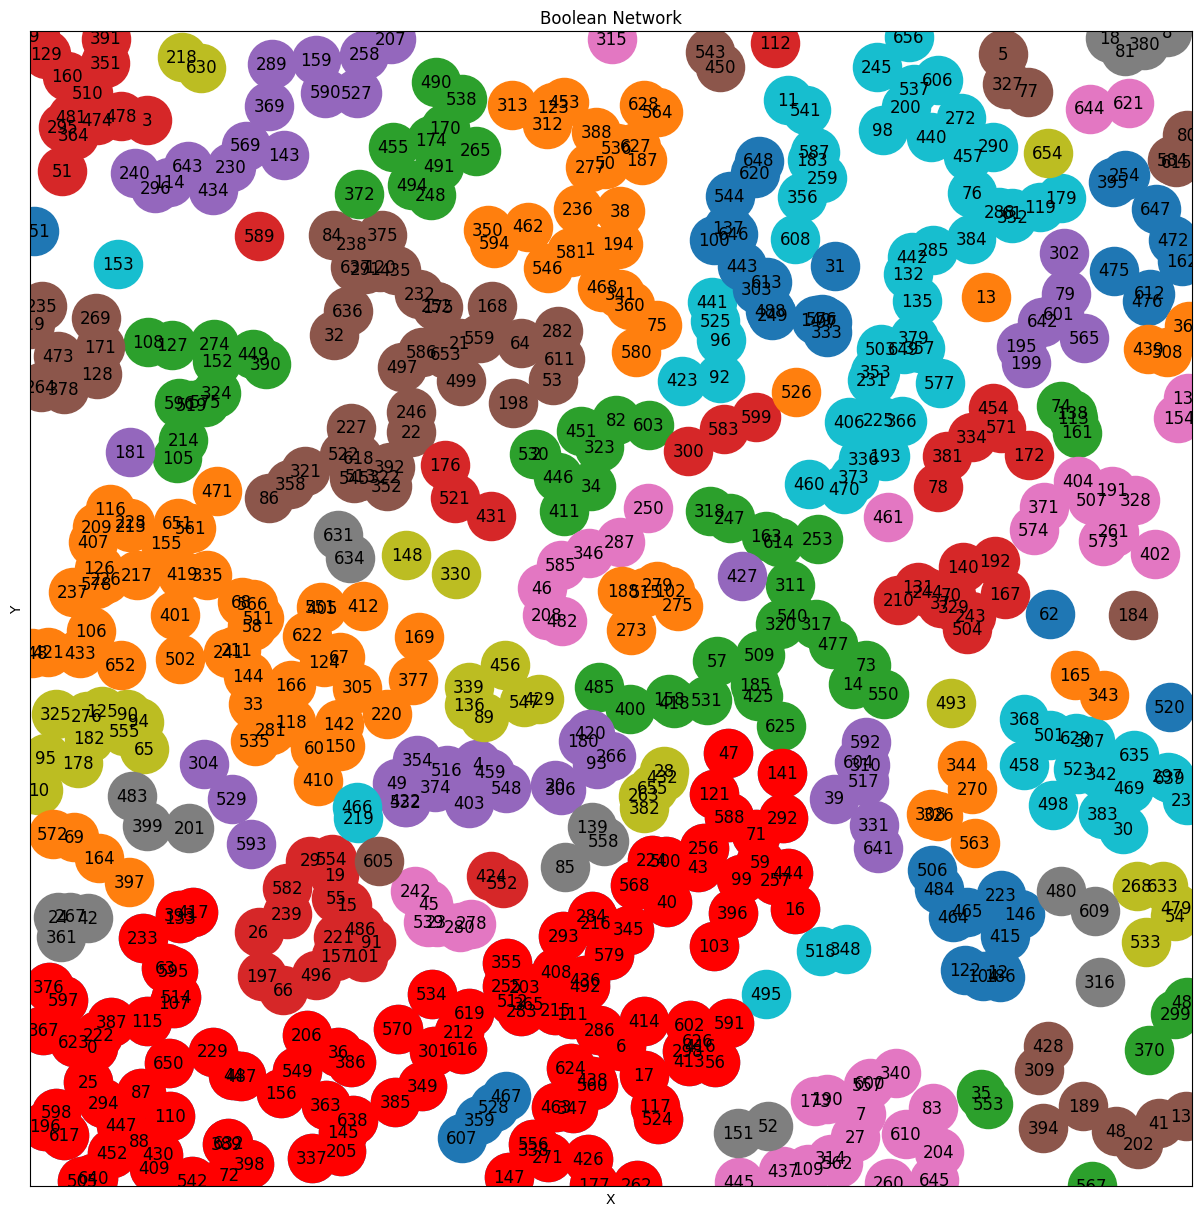

Graph with 657 nodes and 969 edges
clusters:  [{0, 512, 514, 6, 524, 16, 17, 534, 25, 542, 36, 549, 40, 43, 44, 556, 47, 560, 568, 56, 570, 59, 63, 579, 71, 72, 588, 591, 595, 597, 598, 87, 88, 602, 99, 103, 616, 617, 107, 619, 110, 623, 111, 624, 626, 115, 117, 632, 121, 638, 640, 133, 650, 141, 145, 147, 156, 177, 196, 203, 205, 206, 212, 215, 216, 222, 224, 229, 233, 255, 256, 257, 262, 271, 283, 284, 286, 292, 293, 294, 298, 301, 337, 338, 345, 347, 349, 355, 363, 365, 367, 376, 385, 386, 387, 389, 393, 396, 398, 408, 409, 413, 414, 416, 417, 426, 430, 436, 438, 444, 447, 452, 463, 487, 492, 500, 505}, {1, 388, 277, 536, 546, 38, 50, 564, 312, 313, 187, 194, 580, 581, 453, 75, 462, 594, 468, 341, 350, 360, 236, 627, 628, 123}, {2, 34, 323, 451, 530, 82, 603, 411, 446}, {160, 481, 129, 3, 510, 295, 391, 9, 364, 51, 474, 478, 351}, {354, 4, 516, 548, 422, 459, 49, 403, 532, 374}, {77, 5, 327}, {7, 557, 173, 109, 562, 340, 437, 600, 314, 27, 445, 190}, {8, 81, 18, 380}, {65, 325, 10, 

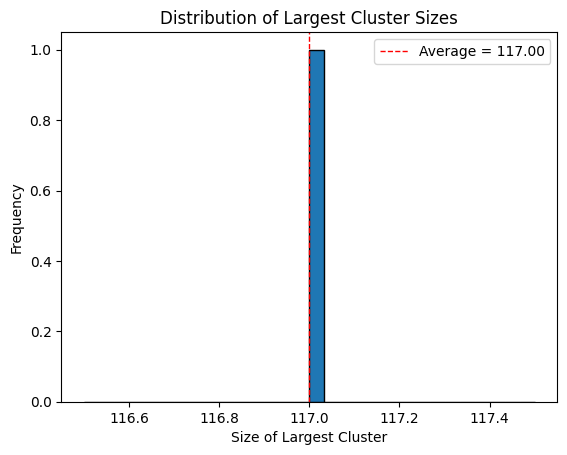

In [35]:
#BEST VERSION
#input:
r = 1 #radius of discs

#T = np.random.randint(100,200) #set size of the squared domain as a rnadom value between 10 e 20  
#T = 200 #set size of the domain #200 -> too much time , test with 10
T =50

#density lambda
density = 0.25 #i dont know the best number!! (PER OGNI LOOP DEVO AUMENTARE LA DENSITA DI UN TOT)
# T = 50, M = 10
#density = 0.1 -> average 11
#density = 0.2 -> average 41
#density = 0.35 -> average 468
#density = 0.4 -> average 758
#density = 0.5 -> average 1174

#i have to also set the number of simulation 
M = 1

# now i try to generate the points
#for the pois i can use the formulation or i can search a library (numpy)
#pois is lambda * T^2
N_points = number_points(density,T) #INSERIRLO NELLA CREAZIONE DEL BOOLE ?

#list with all the largest cluster
largest_cluster = []

#----------------

for i in range(M):


    #now i create the boolean network model
    #ATTENZIONE dall esempio/projetto mi sembra che al creation_bool devo passare il numero di
    #punti nel dominio e non i punti; forse i punti li devo creare nel creation_bool
    #pero guardando l'esempio del algorithmo di poisson mi verebbe da fare tutto 
    #in un colpo; in caso creare due versioni!!!
    #OPPURE nel loop per creare i graph metto anche quello er la creazione
    #dei punti pero dovrei tenere fuori N (X) perchè è sempre lo stesso nella 
    #creazione del boolean network (quindi creazione N; loop -> creazione loop, creazione bool)
    graph_bool = creation_boolean_network_test2(N_points, T, r)
    print(graph_bool)
    #structure of the graph
    #for node,edges in zip(graph_bool.nodes,graph_bool.edges):
        #print(f'node: {node} -> edges: {edges}')

    #find the largest cluster
    #largest_cluster = find_largest_cluster(graph_bool)
    largest_cluster.append(find_largest_cluster(graph_bool))

print(largest_cluster)
empirical_average(largest_cluster)

#PROVA


# TEST 3

differenza con il test 4 è quando creo i punti N; qua creo il valore N cioè il numero di punti una sola volta che verrà utilizzato per tutte le simulazioni indipendenti M. Nel test 4 invece N è sempre ri-calcolata per ogni simulazione indipendente.

Credo non ci sia differenza perchè quando scelgo un M grande comunque nel test 4 arriverò ad avere un risulato che comunque rispecchia la media del numero di punti creati

add the question about the density_c and the number of cluster

In [ ]:
# TEST 3

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

my_generator = np.random.default_rng()

def number_points(density, T):

    #number of points
    N = my_generator.poisson(lam=density*T*T)
    return N

# A Boolean random network on the plane, denoted by (X, λ, r)
#in this case i create le function in a different way becouse it is iteractive
#and N have to be always the same
def creation_boolean_network_test2(N_points, T, r):

    #creation points
    points = my_generator.uniform(low = 0, high = T, size = (N_points, 2))
    #the points are equaly distributet between the domanin so 0 and T and have a structure (U, V) so N*2

    if (len(points) == 0): #we dont have points
        print("error no points in the domain = 0") #impossible
        return
    else: 

        #creation graph
        #empty graph
        #nx.Graph? A Graph stores nodes and edges with optional data, or attributes
        #Edges are represented as links between nodes with optional key/value attributes
        graph = nx.Graph()
        #add the points in the graph (nodes)
        #graph.add_nodes_from? nodes_for_adding : iterable container, attr: attributes
        graph.add_nodes_from(range(N_points))

        #two elements x, y ∈ X are connected if their Euclidean distance is smaller than or equal to 2r
        #check if two points have distance(euclidea) < 2*r
        for i in range(N_points):
            for j in range(i+1, N_points):
                #if euclidean_distance(points[i] - points[j]) <= 2*r: #TEST
                #    graph.add_edge(i,j)
                if np.linalg.norm(points[i] - points[j]) <= 2*r:
                    graph.add_edge(i, j) #add edge between nodei and node

        return graph

def create_clusters(graph):
    
    #create the cluster
    #find alle the connected components
    #connected_components -> implements DFS or BFS
    clusters = list(nx.connected_components(graph))
    print(clusters)
    return clusters
    

def find_largest_cluster(clusters):
    #create/understand the cluster
    #find alle the connected components
    #connected_components -> implements DFS or BFS
    #clusters = list(nx.connected_components(graph)) 
    
    #find the largest cluster
    largest_cluster = max(clusters, key=len)
    print(largest_cluster)

    #return the size of the largest cluster
    return len(largest_cluster)

def find_number_of_clusters(clusters):
    #clusters = list(nx.connected_components(graph)) #try to use the function only one time to speed up the code
    return len(clusters)

#------------------------------------------------

#radius of discs
r = 1 

#for the domain from 0 to T
T = 50

#density_c
density_c = 4.512 / (4 * np.pi) #critical density

#density lambda
density = []
for i in np.arange(0.05, 0.50, 0.05).round(2):
    density.append(i)

#i have to also set the number of simulation 
M = 10

#list with all the largest cluster depending by density
largest_cluster_density = []
#list with the number of cluster depending by density
number_of_cluster_density = []

#----------------------------------------------------------

#run simulation depending on the density
for i in density:

    #list for the independent simulation
    largest_cluster_M = []
    number_of_cluster_M = []
    
    # now i try to generate the points
    #for the pois i can use the formulation or i can search a library (numpy)
    #pois is lambda * T^2
    N_points = number_points(i,T) #MODIFICARE E METTERLO DENTRO A CREATION BOOLEAN NETWORK ?

    #run the independent simulation
    for j in range(M):

        #now i create the boolean network model
        graph_bool = creation_boolean_network_test2(N_points, T, r)
        print(graph_bool)

        #cluster the points
        clusters = create_clusters(graph_bool)

        #find the largest cluster
        #largest_cluster = find_largest_cluster(graph_bool)
        largest_cluster_M.append(find_largest_cluster(clusters))

        #find the number of cluster
        number_of_cluster_M.append(find_number_of_clusters(clusters))

    largest_cluster_density.append(np.mean(largest_cluster_M))
    number_of_cluster_density.append(np.mean(number_of_cluster_M))

#print the 2 list for density
print("largest cluster by density: ", largest_cluster_density)
print("number of cluster by density: ", number_of_cluster_density)

# Plotting the size of the largest cluster against lambda
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(density, largest_cluster_density, marker='o', linestyle='-')
plt.axvline(x=density_c, color='r', linestyle='--', label=f'λc = {density_c:.3f}')
plt.xlabel('λ (Density)')
plt.ylabel('Average Size of the Largest Cluster')
plt.title('Size of the Largest Cluster vs. λ')
plt.legend()

# Plotting the number of clusters against lambda
plt.subplot(1, 2, 2)
plt.plot(density, number_of_cluster_density, marker='o', linestyle='-')
plt.axvline(x=density_c, color='r', linestyle='--', label=f'λc = {density_c:.3f}')
plt.xlabel('λ (Density)')
plt.ylabel('Average Number of Clusters')
plt.title('Number of Clusters vs. λ')
plt.legend()


density from 0.05 to 0.5 and step = 0.05

T = 100

M = 20

time -> 60 min

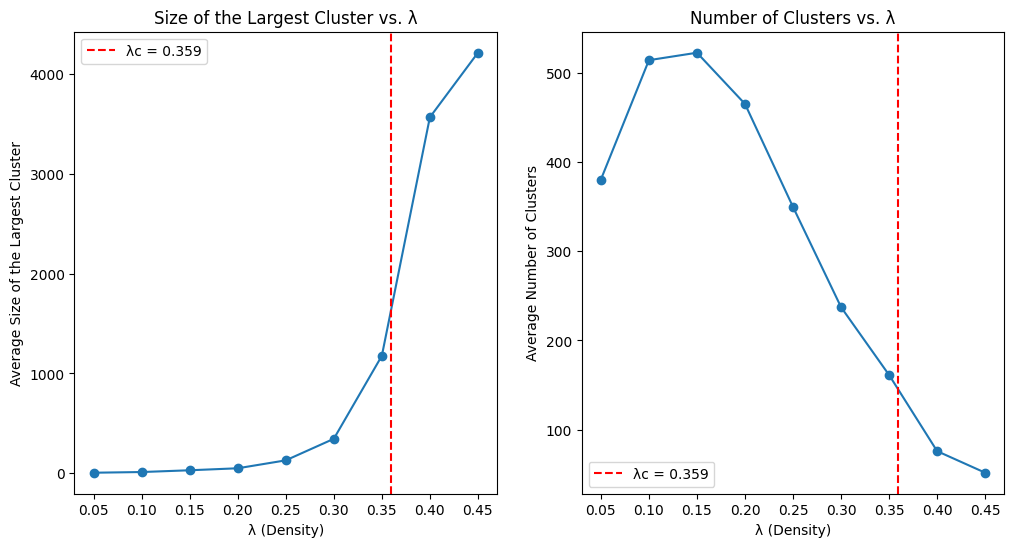

# TEST 4

In [ ]:
# TEST 4

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

my_generator = np.random.default_rng()

# A Boolean random network on the plane, denoted by (X, λ, r)
#in this case i create le function in a different way becouse it is iteractive
#and N have to be always the same
def creation_boolean_network_test2(density, T, r):

    
    #number of points
    N = my_generator.poisson(lam=density*T*T)
    #creation points
    points = my_generator.uniform(low = 0, high = T, size = (N, 2))
    #the points are equaly distributet between the domanin so 0 and T and have a structure (U, V) so N*2

    if (len(points) == 0): #we dont have points
        print("error no points in the domain = 0") #impossible
        return
    else: 

        #creation graph
        #A Graph stores nodes and edges with optional data, or attributes
        #Edges are represented as links between nodes with optional key/value attributes
        graph = nx.Graph()
        #add the points in the graph (nodes)
        graph.add_nodes_from(range(N))

        #two elements x, y ∈ X are connected if their Euclidean distance is smaller than or equal to 2r
        #check if two points have distance(euclidea) < 2*r
        for i in range(N):
            for j in range(i+1, N):
                #if euclidean_distance(points[i] - points[j]) <= 2*r: #TEST
                #    graph.add_edge(i,j)
                if np.linalg.norm(points[i] - points[j]) <= 2*r:
                    graph.add_edge(i, j) #add edge between nodei and node

        return graph

def create_clusters(graph):
    
    #create the cluster
    #find alle the connected components
    #connected_components -> implements DFS or BFS
    clusters = list(nx.connected_components(graph))
    print(clusters)
    return clusters
    

def find_largest_cluster(clusters):
    #create/understand the cluster
    #find alle the connected components
    #connected_components -> implements DFS or BFS
    #clusters = list(nx.connected_components(graph)) 
    
    #find the largest cluster
    largest_cluster = max(clusters, key=len)
    print(largest_cluster)

    #return the size of the largest cluster
    return len(largest_cluster)

def find_number_of_clusters(clusters):
    #clusters = list(nx.connected_components(graph)) #try to use the function only one time to speed up the code
    return len(clusters)

#------------------------------------------------

#radius of discs
r = 1 

#for the domain from 0 to T
T = 50

#density_c
density_c = 4.512 / (4 * np.pi) #critical density

#density lambda
density = []
for i in np.arange(0.05, 0.50, 0.05).round(2):
    density.append(i)

#i have to also set the number of simulation 
M = 10

#list with all the largest cluster depending by density
largest_cluster_density = []
#list with the number of cluster depending by density
number_of_cluster_density = []

#----------------------------------------------------------

#run simulation depending on the density
for i in density:

    #list for the independent simulation
    largest_cluster_M = []
    number_of_cluster_M = []
    
    # now i try to generate the points
    #for the pois i can use the formulation or i can search a library (numpy)
    #pois is lambda * T^2
    #N_points = number_points(i,T)

    #run the independent simulation
    for j in range(M):

        #now i create the boolean network model
        graph_bool = creation_boolean_network_test2(i, T, r) #density, max domain, radius
        print(graph_bool)

        #cluster the points
        clusters = create_clusters(graph_bool)

        #find the largest cluster
        #largest_cluster = find_largest_cluster(graph_bool)
        largest_cluster_M.append(find_largest_cluster(clusters))

        #find the number of cluster
        number_of_cluster_M.append(find_number_of_clusters(clusters))

    largest_cluster_density.append(np.mean(largest_cluster_M))
    number_of_cluster_density.append(np.mean(number_of_cluster_M))

#print the 2 list for density
print("largest cluster by density: ", largest_cluster_density)
print("number of cluster by density: ", number_of_cluster_density)

# Plotting the size of the largest cluster against lambda
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(density, largest_cluster_density, marker='o', linestyle='-')
plt.axvline(x=density_c, color='r', linestyle='--', label=f'λc = {density_c:.3f}')
plt.xlabel('λ (Density)')
plt.ylabel('Average Size of the Largest Cluster')
plt.title('Size of the Largest Cluster vs. λ')
plt.legend()

# Plotting the number of clusters against lambda
plt.subplot(1, 2, 2)
plt.plot(density, number_of_cluster_density, marker='o', linestyle='-')
plt.axvline(x=density_c, color='r', linestyle='--', label=f'λc = {density_c:.3f}')
plt.xlabel('λ (Density)')
plt.ylabel('Average Number of Clusters')
plt.title('Number of Clusters vs. λ')
plt.legend()


# FINAL

Percolation theory describes how the size of clusters of connected set of edges of large random networks
varies as the connectivity - i.e. (for example) the probability that two vertices are connected by an edge - changes. As the
connectivity increases (density) the system undergoes a transition from a situation where the clusters are small in size to
a picture with significantly larger clusters. This transition is not smooth, but rather it happens sharply as the
connectivity crosses a critical value (critical density), called percolation threshold∗. The scope of the present project is to study
numerically this phenomenon in Boolean networks

Library

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


my_generator = np.random.default_rng()

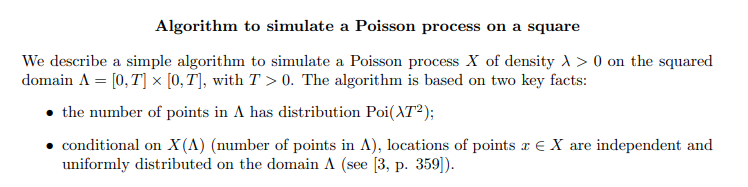

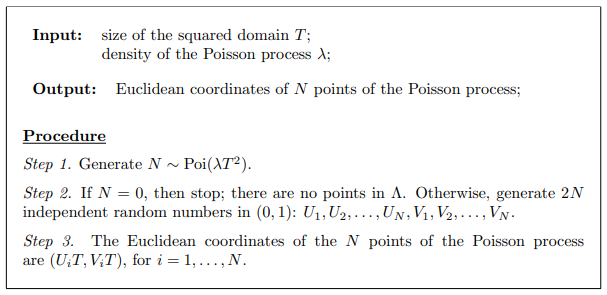

In [77]:
def creation_points(density, T):

    #number of points
    N = my_generator.poisson(lam=density*T*T)
    #creation points
    points = my_generator.uniform(low = 0, high = T, size = (N, 2))
    #the points are equaly distributet between the domanin so 0 and T and have a structure (U, V) so N*2

    return N, points


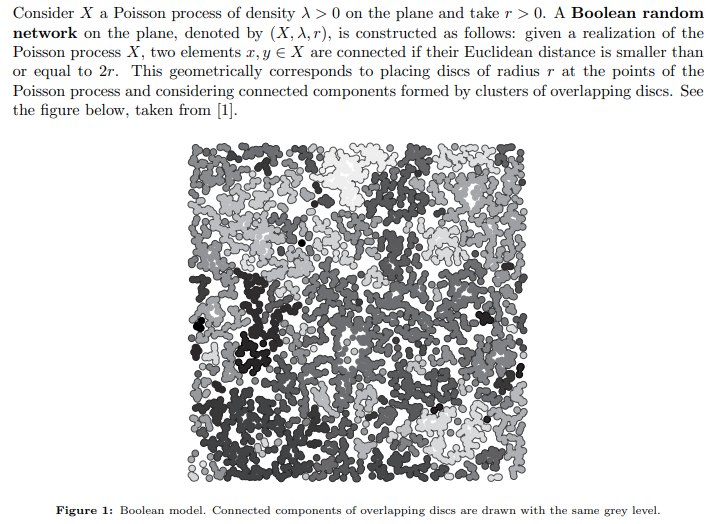

In [78]:
def creation_boolean_network_test2(density, T, r):

    N, points = creation_points(density, T)    

    if (len(points) == 0): #we dont have points
        print("error no points in the domain = 0") #impossible
        return
    else: 

        #creation graph
        #A Graph stores nodes and edges with optional data, or attributes
        #Edges are represented as links between nodes with optional key/value attributes
        graph = nx.Graph()
        #add the points in the graph (nodes)
        graph.add_nodes_from(range(N))

        #two elements x, y ∈ X are connected if their Euclidean distance is smaller than or equal to 2r
        #check if two points have distance(euclidea) < 2*r
        for i in range(N):
            for j in range(i+1, N):
                #if euclidean_distance(points[i] - points[j]) <= 2*r: #TEST
                #    graph.add_edge(i,j)
                if np.linalg.norm(points[i] - points[j]) <= 2*r:
                    graph.add_edge(i, j) #add edge between nodei and node

        return graph


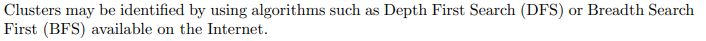

In [79]:
def create_clusters(graph):
    
    #create the cluster
    #find alle the connected components
    #connected_components -> implements DFS or BFS
    clusters = list(nx.connected_components(graph))
    
    return clusters

In [80]:
def find_largest_cluster(clusters):
    
    #find the largest cluster
    largest_cluster = max(clusters, key=len)

    #return the size of the largest cluster
    return len(largest_cluster)


In [81]:
def find_number_of_clusters(clusters):
    return len(clusters)

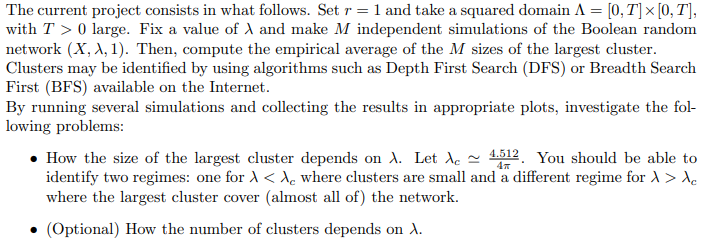

largest cluster by density:  [4.2, 10.5, 18.3, 37.9, 77.7, 207.2, 311.6, 791.8, 1022.1]
number of cluster by density:  [90.7, 130.2, 131.1, 119.0, 94.2, 65.5, 46.3, 28.0, 19.0]


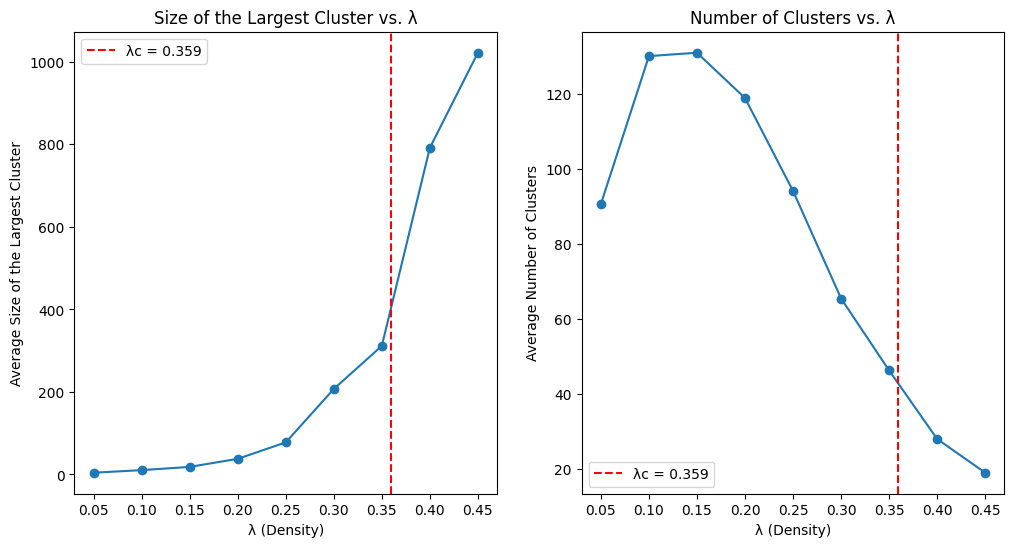

In [82]:
#radius of discs
r = 1 

#for the domain from 0 to T
T = 50

#density_c
density_c = 4.512 / (4 * np.pi) #critical density

#density lambda
density = []
for i in np.arange(0.05, 0.50, 0.05).round(2):
    density.append(i)

#i have to also set the number of simulation 
M = 10

#list with all the largest cluster depending by density
largest_cluster_density = []
#list with the number of cluster depending by density
number_of_cluster_density = []

#----------------------------------------------------------

#run simulation depending on the density
for i in density:

    #list for the independent simulation
    largest_cluster_M = []
    number_of_cluster_M = []
    
    # now i try to generate the points
    #for the pois i can use the formulation or i can search a library (numpy)
    #pois is lambda * T^2
    #N_points = number_points(i,T) #MODIFICARE E METTERLO DENTRO A CREATION BOOLEAN NETWORK!!!!!!!!!!!!!!

    #run the independent simulation
    for j in range(M):

        #now i create the boolean network model
        graph_bool = creation_boolean_network_test2(i, T, r) #density, max domain, radius
        #print(graph_bool)

        #cluster the points
        clusters = create_clusters(graph_bool)

        #find the largest cluster
        #largest_cluster = find_largest_cluster(graph_bool)
        largest_cluster_M.append(find_largest_cluster(clusters))

        #find the number of cluster
        number_of_cluster_M.append(find_number_of_clusters(clusters))

    largest_cluster_density.append(np.mean(largest_cluster_M))
    number_of_cluster_density.append(np.mean(number_of_cluster_M))

#print the 2 list for density
print("largest cluster by density: ", largest_cluster_density)
print("number of cluster by density: ", number_of_cluster_density)

# Plotting the size of the largest cluster against lambda
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(density, largest_cluster_density, marker='o', linestyle='-')
plt.axvline(x=density_c, color='r', linestyle='--', label=f'λc = {density_c:.3f}')
plt.xlabel('λ (Density)')
plt.ylabel('Average Size of the Largest Cluster')
plt.title('Size of the Largest Cluster vs. λ')
plt.legend()

# Plotting the number of clusters against lambda
plt.subplot(1, 2, 2)
plt.plot(density, number_of_cluster_density, marker='o', linestyle='-')
plt.axvline(x=density_c, color='r', linestyle='--', label=f'λc = {density_c:.3f}')
plt.xlabel('λ (Density)')
plt.ylabel('Average Number of Clusters')
plt.title('Number of Clusters vs. λ')
plt.legend()
